In [1]:
import torch
import numpy as np
import phi.torch.flow as ptf

device = torch.device('cuda')

In [2]:
BOUNDS = ptf.Box(x=1, y=1, z=1)
RESOLUTION = 100
INFLOW = ptf.CenteredGrid(
    values=ptf.Sphere(center=ptf.tensor([0.5, 0, 0.5], ptf.channel(vector='x,y,z')), radius=0.05),
    extrapolation=ptf.extrapolation.ZERO,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)

In [3]:
import tqdm

VELOCITY = ptf.StaggeredGrid(
    values=0,
    extrapolation=ptf.extrapolation.ZERO,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)

index1 = 0
index2 = index1 + 20
den1_np = np.load(f'origin/origin_{index1:03d}.npz')['density']
den2_np = np.load(f'origin/origin_{index2:03d}.npz')['density']
den1_gpu = torch.tensor(den1_np, dtype=torch.float32, device=device)
den2_gpu = torch.tensor(den2_np, dtype=torch.float32, device=device)

DENSITY1 = ptf.CenteredGrid(
    values=ptf.wrap(den1_gpu, ptf.spatial('x,y,z')),
    extrapolation=ptf.extrapolation.ZERO,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)
DENSITY2 = ptf.CenteredGrid(
    values=ptf.wrap(den2_gpu, ptf.spatial('x,y,z')),
    extrapolation=ptf.extrapolation.ZERO,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)

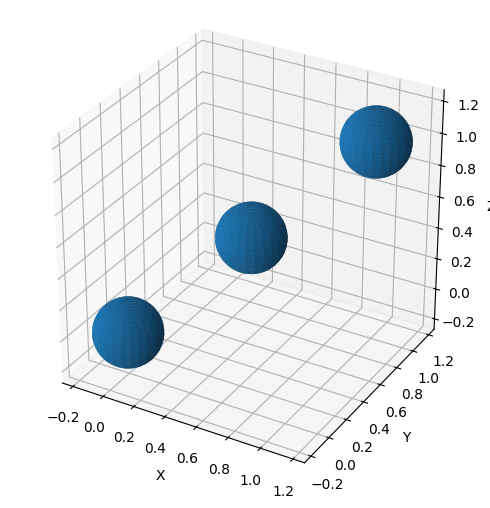

In [39]:
LOCATIONS = [
    ptf.vec(x=0, y=0, z=0),
    ptf.vec(x=0.5, y=0.5, z=0.5),
    ptf.vec(x=1, y=1, z=1)
]

SPHERES = ptf.Sphere(center=ptf.stack(LOCATIONS, dim=ptf.instance('spheres')), radius=0.2)
ptf.plot(SPHERES)

FORCE = ptf.CenteredGrid(
    values=(0, 0, 0),
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)

In [38]:
VAL1 = ptf.CenteredGrid(
    values=(1, 1, 1),
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)
VAL2 = ptf.CenteredGrid(
    values=2,
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)
VAL3 = VAL1 * VAL2
VAL3.numpy('x,y,z,vector').shape

(100, 100, 100, 3)

In [53]:
sdf = ptf.geom.sample_sdf(SPHERES, bounds=BOUNDS, resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION))
VAL4 = ptf.CenteredGrid(
    values=sdf,
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION, z=RESOLUTION),
)

C:\Users\imeho\Documents\VituralEnvs\InstantPINF-TCNN\Lib\site-packages\phi\vis\_matplotlib\_matplotlib_plots.py:167: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # because subplot titles can be added after figure creation


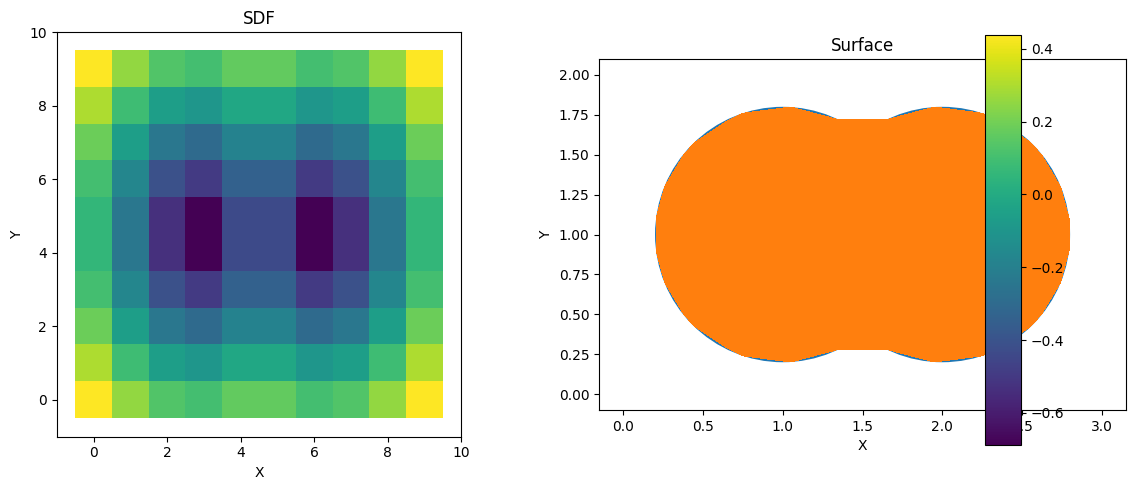

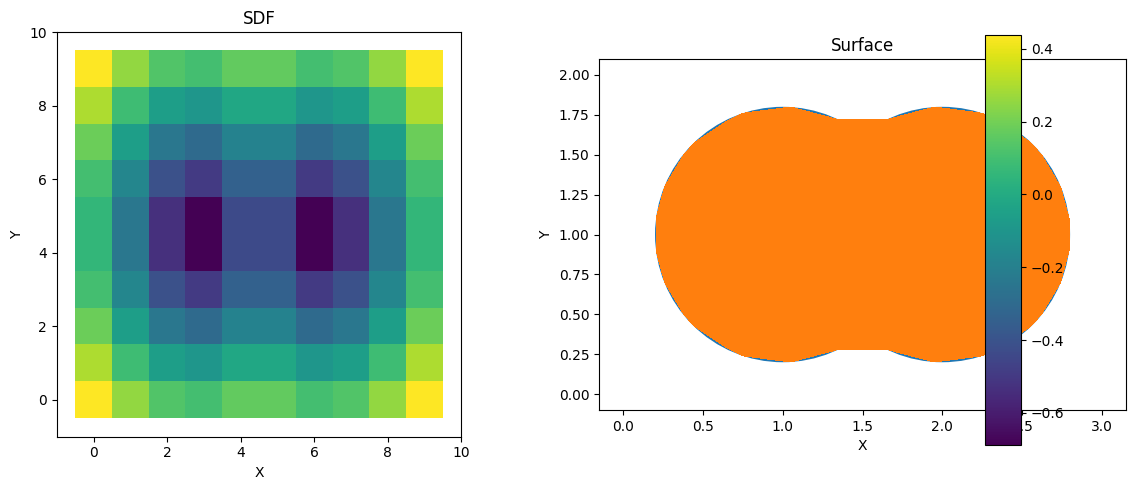

In [51]:
spheres = ptf.Sphere(ptf.vec(x=[1, 2], y=1), radius=.8)
bounds = ptf.Box(x=3, y=2)
sdf = ptf.geom.sample_sdf(spheres, bounds, x=10, y=10)
ptf.plot({"SDF": sdf.values, "Surface": [spheres, sdf]}, overlay='list')

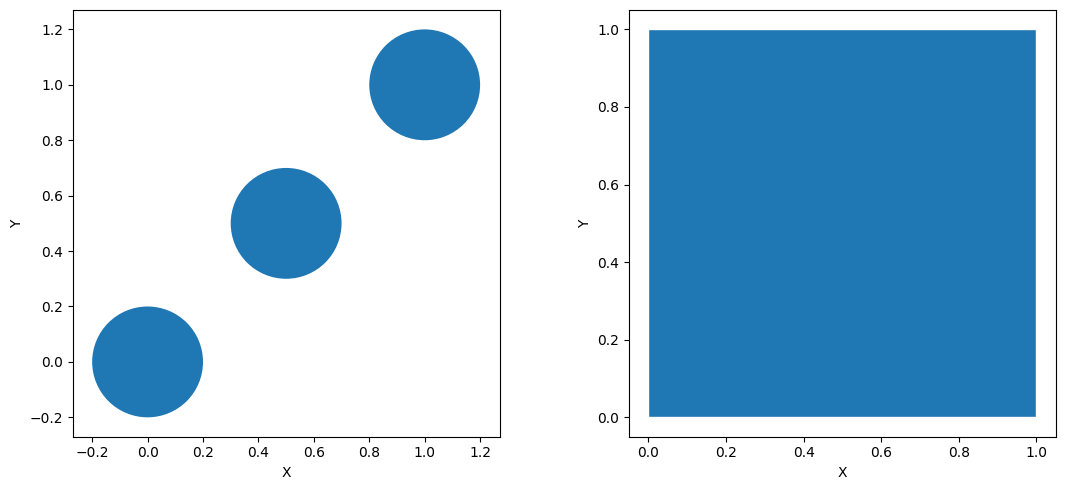

In [59]:
LOCATIONS = [
    ptf.vec(x=0, y=0),
    ptf.vec(x=0.5, y=0.5),
    ptf.vec(x=1, y=1)
]
BOUNDS = ptf.Box(x=1, y=1)
RESOLUTION = 100

SPHERES = ptf.Sphere(center=ptf.stack(LOCATIONS, dim=ptf.instance('spheres')), radius=0.2)
_ = ptf.plot(SPHERES, BOUNDS)

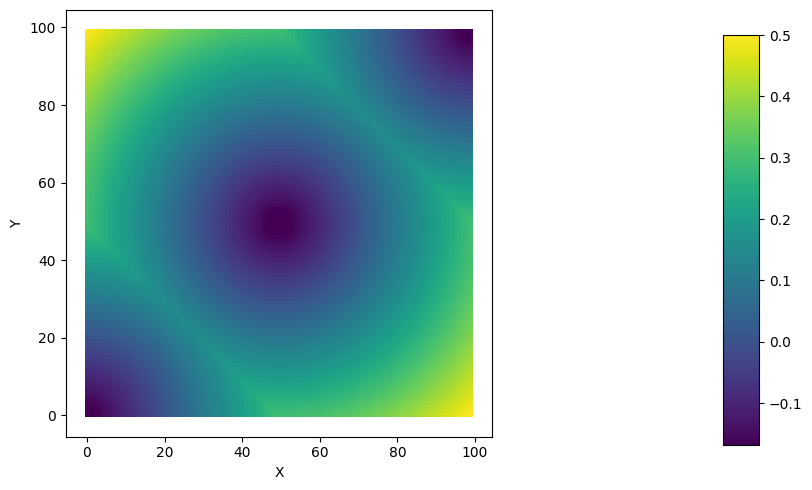

In [67]:
sdf = ptf.geom.sample_sdf(SPHERES, BOUNDS, x=RESOLUTION, y=RESOLUTION)
_ = ptf.plot(sdf.values)

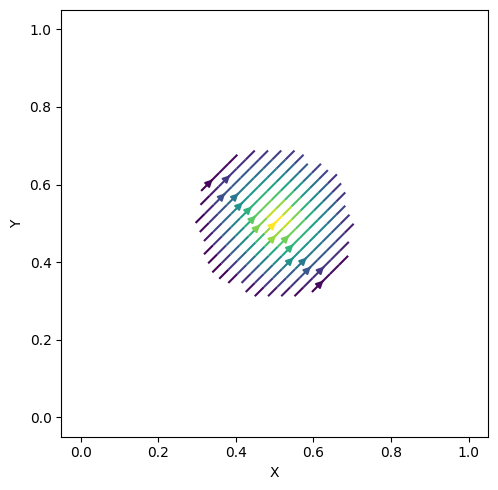

In [91]:
center = ptf.vec(x=0.5, y=0.5)
LAMBDA_RET = ptf.CenteredGrid(
    values=lambda loc: 0.2 - ptf.length(loc - center),
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION),
)
MARK = ptf.CenteredGrid(
    values=lambda loc: ptf.length(loc - center) < 0.2,
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION),
)
VECTOR_FIELD = ptf.CenteredGrid(
    values=(1, 1),
    extrapolation=ptf.extrapolation.ZERO_GRADIENT,
    bounds=BOUNDS,
    resolution=ptf.spatial(x=RESOLUTION, y=RESOLUTION),
)
FINAL_RET = LAMBDA_RET * MARK * VECTOR_FIELD
_ = ptf.plot(FINAL_RET)